In [1]:
# ================================================================
# 📘 USE CASE 2: TOPIC MODELING ON VIEWER FEEDBACK
# Industry: Media & Entertainment
# Project: Viewer Churn Prediction for OTT Platforms
# Platform: Jupyter Notebook
# ================================================================

# ==============================
# STEP 1: Import Libraries
# ==============================
import pandas as pd
import numpy as np
import sqlite3
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation, PCA
import plotly.express as px
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tejae\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\tejae\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
# ==============================
# STEP 2: Load Data from Database (from Use Case 1)
# ==============================
db_path = r"C:\Users\tejae\OneDrive\Desktop\textanalyticscapstone\dataset\ott_sentiment.db"
conn = sqlite3.connect(db_path)

# Load sentiment results
df = pd.read_sql_query("SELECT * FROM sentiment_results", conn)
conn.close()

print("✅ Data Loaded from Database Successfully")
print("Rows:", len(df))
df.head()

✅ Data Loaded from Database Successfully
Rows: 6000


,app_name,reviewId,userName,content,score,at,clean_text,polarity,subjectivity,sentiment
0,Netflix,cb4e0746-f12b-482c-9440-8f0e6417e240,Sa'adatu Bashir,Am sure Netflix is a very good app,5,03-11-2025 10:32,sure netflix good app,0.6,0.744444,Positive
1,Netflix,d4b951db-3286-41a6-bd2c-7ee50abb2478,Entle Sonjica,great no ads,5,03-11-2025 10:19,great ad,0.8,0.750000,Positive
2,Netflix,6dca3694-f14d-4475-b8a9-6aeb8be22ae0,Dim Sum,"Nothing worth watching,waste of money",1,03-11-2025 10:03,nothing worth watchingwaste money,0.3,0.100000,Positive
3,Netflix,f6b1d27e-d127-40ef-9687-135baf75f3db,GUPS DABALI,best,5,03-11-2025 09:46,best,1.0,0.300000,Positive
4,Netflix,f27a1437-f6e2-4bcc-a6b9-4832cc7dea4b,genaro carden,love it,5,03-11-2025 09:42,love,0.5,0.600000,Positive


In [5]:
# ==============================
# STEP 3: Preprocessing (Reusing Same Pipeline)
# ==============================
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = [lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words]
    return ' '.join(tokens)

if 'clean_text' not in df.columns:
    print("🧹 Cleaning text again...")
    df['clean_text'] = df.iloc[:,0].apply(clean_text)
else:
    print("✅ Using cleaned text from previous use case")

✅ Using cleaned text from previous use case


In [7]:
# %%  # Step 3: Clean Text and Prepare Dataset
def clean_text(series):
    s = series.fillna("").astype(str)
    s = s.str.lower()
    s = s.str.replace(r"http\S+|www.\S+", "", regex=True)
    s = s.str.replace(r"[^a-z\s]", " ", regex=True)
    s = s.str.replace(r"\s+", " ", regex=True).str.strip()
    s = s.replace("", np.nan)
    return s

df['clean_content'] = clean_text(df['content'])
df = df.dropna(subset=['clean_content']).reset_index(drop=True)
print("✅ Cleaned text data prepared. Rows:", df.shape[0])


✅ Cleaned text data prepared. Rows: 5803


In [7]:
# ==============================
# STEP 4: Topic Modeling using LDA
# ==============================
print("🔍 Performing Topic Modeling using LDA...")

vectorizer = CountVectorizer(max_df=0.9, min_df=5, stop_words='english')
X = vectorizer.fit_transform(df['clean_text'])

num_topics = 5  # you can change this based on your dataset
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_topics = lda_model.fit_transform(X)

print("✅ LDA Topic Modeling Completed")

🔍 Performing Topic Modeling using LDA...
✅ LDA Topic Modeling Completed


In [9]:
# ==============================
# STEP 5: Display Top Keywords per Topic
# ==============================
def get_top_keywords(model, feature_names, n_words):
    topics = []
    for idx, topic in enumerate(model.components_):
        top_features = [feature_names[i] for i in topic.argsort()[:-n_words - 1:-1]]
        topics.append(" ".join(top_features))
    return topics

feature_names = vectorizer.get_feature_names_out()
topic_keywords = get_top_keywords(lda_model, feature_names, 10)

topics_df = pd.DataFrame({
    'Topic_ID': [f"Topic {i+1}" for i in range(num_topics)],
    'Top_Keywords': topic_keywords
})

print("\n📋 Top Keywords per Topic:")
display(topics_df)


📋 Top Keywords per Topic:


,Topic_ID,Top_Keywords
0,Topic 1,good super app great serial awesome movie ente...
1,Topic 2,app hai netflix movie screen love like ok vide...
2,Topic 3,ad subscription app watch worst premium minute...
3,Topic 4,app worst add bad time watch netflix tv issue ...
4,Topic 5,nice prime pay app video amazon free movie exc...


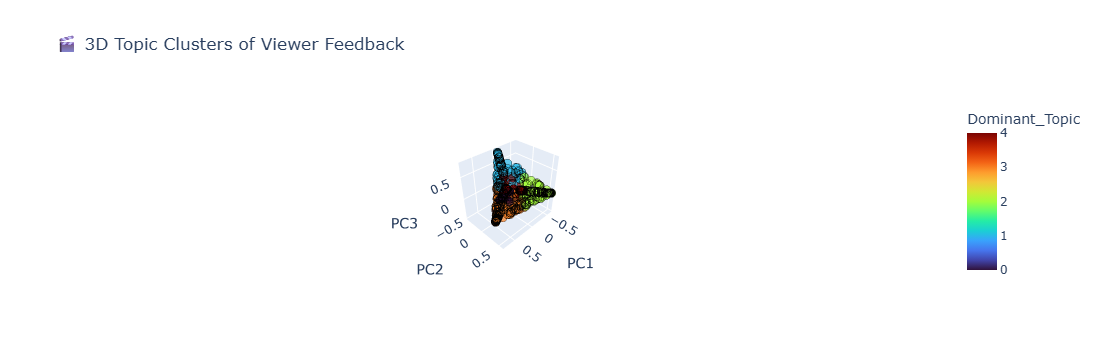

⚠️ PNG save failed (install kaleido if needed): 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido

✅ Interactive HTML saved:
C:\Users\tejae\OneDrive\Desktop\textanalyticscapstone\dataset\UC2_TopicModeling_3D.html


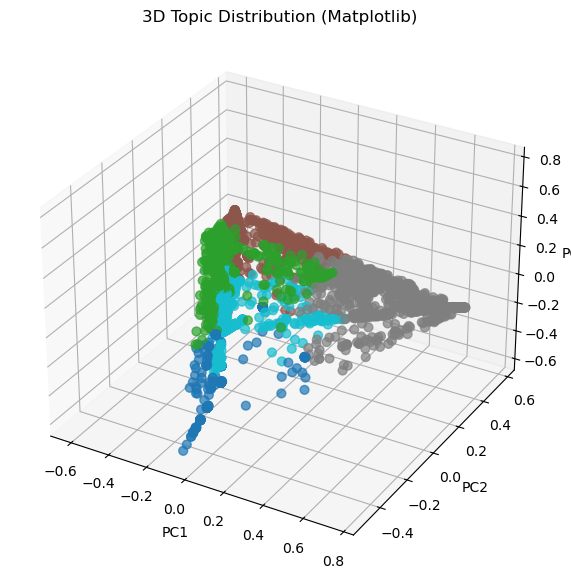

💾 UC2 Matplotlib chart saved to:
C:\Users\tejae\OneDrive\Desktop\textanalyticscapstone\dataset\UC2_TopicModeling_Matplotlib.png


In [23]:
# ==============================
# STEP 6: 3D Topic Visualization + AUTO SAVE (FIXED)
# ==============================
import os  # ✅ Added import to fix NameError

# Perform PCA reduction
pca = PCA(n_components=3, random_state=42)
reduced_topics = pca.fit_transform(lda_topics)
df_topics_vis = pd.DataFrame(reduced_topics, columns=['PC1','PC2','PC3'])
df_topics_vis['Dominant_Topic'] = lda_topics.argmax(axis=1)

# Ensure folder exists
save_folder = r"C:\Users\tejae\OneDrive\Desktop\textanalyticscapstone\dataset"
os.makedirs(save_folder, exist_ok=True)

# --- 3D Visualization (Plotly Interactive) ---
fig = px.scatter_3d(
    df_topics_vis.sample(min(1000, len(df_topics_vis))),
    x='PC1', y='PC2', z='PC3',
    color='Dominant_Topic',
    title='🎬 3D Topic Clusters of Viewer Feedback',
    color_continuous_scale='Turbo',
    opacity=0.7
)
fig.update_traces(marker=dict(size=5, line=dict(width=0.5, color='black')))
fig.show()

# --- Save Plotly Outputs ---
html_path = os.path.join(save_folder, "UC2_TopicModeling_3D.html")
png_path = os.path.join(save_folder, "UC2_TopicModeling_3D.png")

fig.write_html(html_path)
try:
    fig.write_image(png_path)
    print(f"✅ UC2 Plotly visuals saved:\n{html_path}\n{png_path}")
except Exception as e:
    print(f"⚠️ PNG save failed (install kaleido if needed): {e}")
    print(f"✅ Interactive HTML saved:\n{html_path}")

# --- Matplotlib Static Backup ---
fig2 = plt.figure(figsize=(10,7))
ax = fig2.add_subplot(111, projection='3d')
ax.scatter(df_topics_vis['PC1'], df_topics_vis['PC2'], df_topics_vis['PC3'],
           c=df_topics_vis['Dominant_Topic'], cmap='tab10', s=40, alpha=0.7)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('3D Topic Distribution (Matplotlib)')

matplotlib_path = os.path.join(save_folder, "UC2_TopicModeling_Matplotlib.png")
plt.savefig(matplotlib_path, dpi=300, bbox_inches='tight')
plt.show()

print(f"💾 UC2 Matplotlib chart saved to:\n{matplotlib_path}")


In [15]:


# ==============================
# STEP 7: Save Results to Database & CSV
# ==============================
df_topics['review_text'] = df['clean_text']

conn = sqlite3.connect(db_path)
df_topics.to_sql('topic_modeling_results', conn, if_exists='replace', index=False)
conn.commit()
conn.close()

output_path = r"C:\Users\tejae\OneDrive\Desktop\textanalyticscapstone\dataset\ott_topic_model_output.csv"
df_topics.to_csv(output_path, index=False)

print(f"💾 Topic modeling results saved to database and CSV at:\n{output_path}")

💾 Topic modeling results saved to database and CSV at:
C:\Users\tejae\OneDrive\Desktop\textanalyticscapstone\dataset\ott_topic_model_output.csv


In [19]:
# ==============================
# STEP 8: Insights
# ==============================
print("\n📊 Topic Modeling Summary:")
for i, row in topics_df.iterrows():
    print(f"{row['Topic_ID']}: {row['Top_Keywords']}")

print("\n✅ USE CASE 2 EXECUTION COMPLETED SUCCESSFULLY!")


📊 Topic Modeling Summary:
Topic 1: good super app great serial awesome movie entertainment watch account
Topic 2: app hai netflix movie screen love like ok video best
Topic 3: ad subscription app watch worst premium minute experience best min
Topic 4: app worst add bad time watch netflix tv issue subscription
Topic 5: nice prime pay app video amazon free movie excellent dont

✅ USE CASE 2 EXECUTION COMPLETED SUCCESSFULLY!
